In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_potsdam = pd.read_csv("potsdam-zentrum,-germany-air-quality.csv")
df_potsdam['date'] = pd.to_datetime(df_potsdam['date'])
df_potsdam.sort_values(by='date', ascending=False, inplace=True)
df_potsdam.drop(columns=[' o3', ' no2', ' so2', ' co'], inplace=True)
df_potsdam.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df_potsdam.replace(' ', np.nan, inplace=True)
df_potsdam['pm10'] = pd.to_numeric(df_potsdam['pm10'], downcast='float')
df_potsdam['pm25'] = pd.to_numeric(df_potsdam['pm25'], downcast='float')

In [3]:
df_potsdam

,date,pm25,pm10
27,2023-12-28,21.0,NaN
26,2023-12-27,26.0,6.0
25,2023-12-26,14.0,10.0
24,2023-12-25,15.0,5.0
23,2023-12-24,11.0,5.0
...,...,...,...
2872,2014-08-23,NaN,13.0
2871,2014-08-22,NaN,14.0
2870,2014-08-21,NaN,11.0
2869,2014-08-20,NaN,7.0


In [4]:
df_potsdam.aggregate({'pm10':['min', 'max', 'mean', 'median'], 'pm25':['min', 'max', 'mean', 'median']})

,pm10,pm25
min,2.000000,5.000000
max,78.000000,125.000000
mean,17.088469,41.364704
median,14.000000,38.000000


[Text(0, 0.5, '(µg/m³)')]

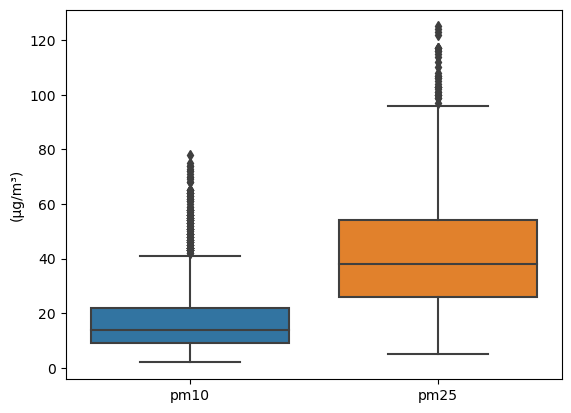

In [5]:
sns.boxplot(data=df_potsdam.loc[:, ['pm10', 'pm25']]).set(ylabel='(µg/m³)')


In [6]:
df_potsdam.sort_values(by='pm10', ascending=False).head(10)

,date,pm25,pm10
2289,2016-05-06,NaN,78.0
2339,2016-06-25,NaN,75.0
2294,2016-05-11,NaN,74.0
2295,2016-05-12,NaN,74.0
2290,2016-05-07,NaN,73.0
2338,2016-06-24,NaN,72.0
2293,2016-05-10,NaN,72.0
2291,2016-05-08,NaN,71.0
2321,2016-06-07,NaN,70.0
2318,2016-06-04,NaN,70.0


In [7]:
df_potsdam.sort_values(by='pm25', ascending=False).head(10)

,date,pm25,pm10
2098,2018-03-05,125.0,48.0
437,2022-12-16,124.0,24.0
1821,2018-10-18,123.0,26.0
1736,2019-01-23,122.0,39.0
425,2022-12-04,117.0,24.0
1737,2019-01-24,117.0,34.0
2099,2018-03-06,117.0,47.0
1747,2019-02-03,116.0,19.0
1773,2019-03-01,116.0,22.0
1746,2019-02-02,115.0,39.0


Text(0.5, 1.0, 'Air quality PM2.5 and PM10')

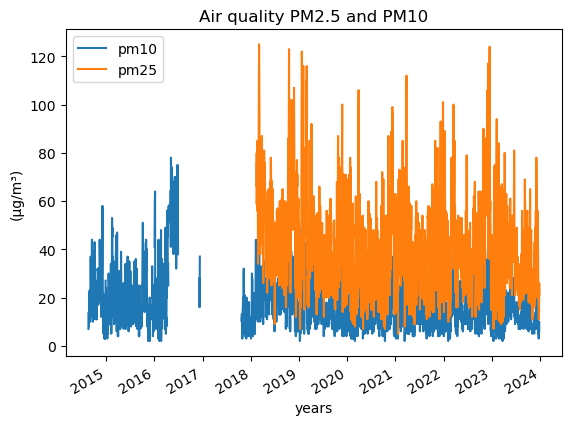

In [8]:
df_potsdam.plot(x='date', y=['pm10', 'pm25'], kind="line")
plt.xlabel('years')
plt.ylabel('(µg/m³)')
plt.title('Air quality PM2.5 and PM10')

In [9]:
df_potsdam['city'] = 'potsdam'

In [10]:
def air_pollution_level(value):
    if value == value and value <= 50: #exclude NaN
        return "good"
    elif 51 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"

df_potsdam['pm10_pollution_level'] = df_potsdam['pm10'].map(air_pollution_level)
df_potsdam['pm25_pollution_level'] = df_potsdam['pm25'].map(air_pollution_level)

In [11]:
df_potsdam.loc[:,['city','date','pm10','pm10_pollution_level','pm25','pm25_pollution_level']]

,city,date,pm10,pm10_pollution_level,pm25,pm25_pollution_level
27,potsdam,2023-12-28,NaN,no data,21.0,good
26,potsdam,2023-12-27,6.0,good,26.0,good
25,potsdam,2023-12-26,10.0,good,14.0,good
24,potsdam,2023-12-25,5.0,good,15.0,good
23,potsdam,2023-12-24,5.0,good,11.0,good
...,...,...,...,...,...,...
2872,potsdam,2014-08-23,13.0,good,NaN,no data
2871,potsdam,2014-08-22,14.0,good,NaN,no data
2870,potsdam,2014-08-21,11.0,good,NaN,no data
2869,potsdam,2014-08-20,7.0,good,NaN,no data


In [12]:
df_potsdam['pm10_pollution_level'].value_counts()

pm10_pollution_level
good        2829
moderate      76
no data       18
Name: count, dtype: int64

Text(0.5, 1.0, 'Air quality PM10')

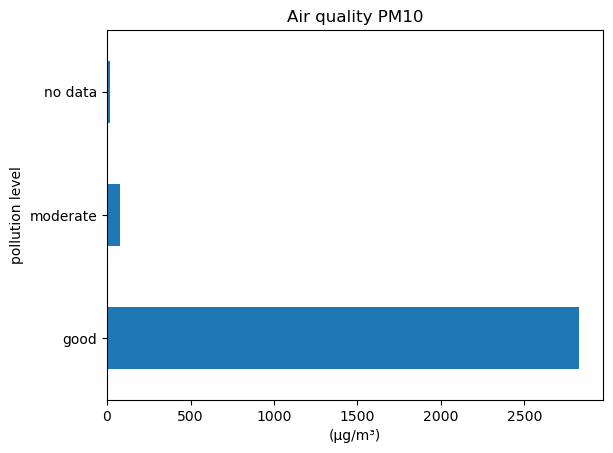

In [13]:
df_potsdam['pm10_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Air quality PM10')


In [14]:
df_potsdam['pm25_pollution_level'].value_counts()

pm25_pollution_level
good                              1494
no data                            798
moderate                           604
unhealthy for sensitive groups      27
Name: count, dtype: int64

In [15]:
df_potsdam.groupby(['pm25_pollution_level']).get_group('unhealthy for sensitive groups')

,date,pm25,pm10,city,pm10_pollution_level,pm25_pollution_level
437,2022-12-16,124.0,24.0,potsdam,good,unhealthy for sensitive groups
436,2022-12-15,108.0,44.0,potsdam,good,unhealthy for sensitive groups
425,2022-12-04,117.0,24.0,potsdam,good,unhealthy for sensitive groups
422,2022-12-01,103.0,25.0,potsdam,good,unhealthy for sensitive groups
421,2022-11-30,106.0,35.0,potsdam,good,unhealthy for sensitive groups
812,2021-12-28,101.0,15.0,potsdam,good,unhealthy for sensitive groups
811,2021-12-27,101.0,35.0,potsdam,good,unhealthy for sensitive groups
1076,2021-03-26,112.0,18.0,potsdam,good,unhealthy for sensitive groups
1075,2021-03-25,103.0,46.0,potsdam,good,unhealthy for sensitive groups
1441,2020-03-28,106.0,14.0,potsdam,good,unhealthy for sensitive groups


Text(0.5, 1.0, 'Air quality PM2.5')

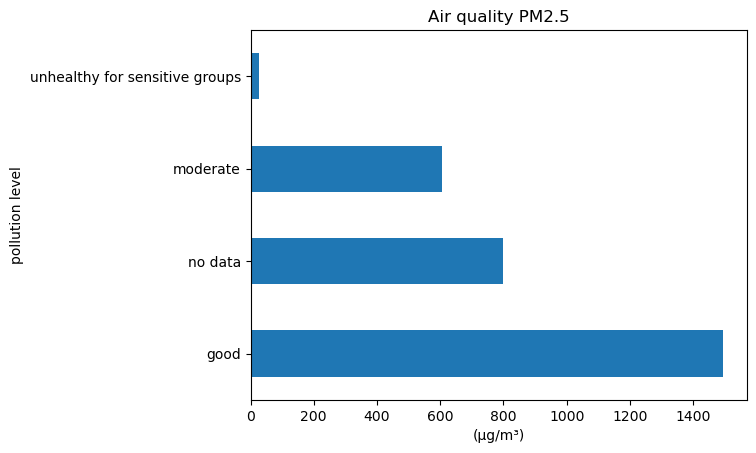

In [16]:
df_potsdam['pm25_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Air quality PM2.5')


In [17]:
###woh air quality guideline for pm 10

def who10_pollution_level(value):
    if value == value and value <= 15: #exclude NaN
        return "good"
    elif 16 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"

df_potsdam['pm10_pollution_level'] = df_potsdam['pm10'].map(who10_pollution_level)


In [18]:
df_potsdam.loc[:,['city','date','pm10','pm10_pollution_level']]

,city,date,pm10,pm10_pollution_level
27,potsdam,2023-12-28,NaN,no data
26,potsdam,2023-12-27,6.0,good
25,potsdam,2023-12-26,10.0,good
24,potsdam,2023-12-25,5.0,good
23,potsdam,2023-12-24,5.0,good
...,...,...,...,...
2872,potsdam,2014-08-23,13.0,good
2871,potsdam,2014-08-22,14.0,good
2870,potsdam,2014-08-21,11.0,good
2869,potsdam,2014-08-20,7.0,good


In [19]:
df_potsdam['pm10_pollution_level'].value_counts()

pm10_pollution_level
good        1590
moderate    1315
no data       18
Name: count, dtype: int64

Text(0.5, 1.0, 'Who suggestions for Air quality PM10')

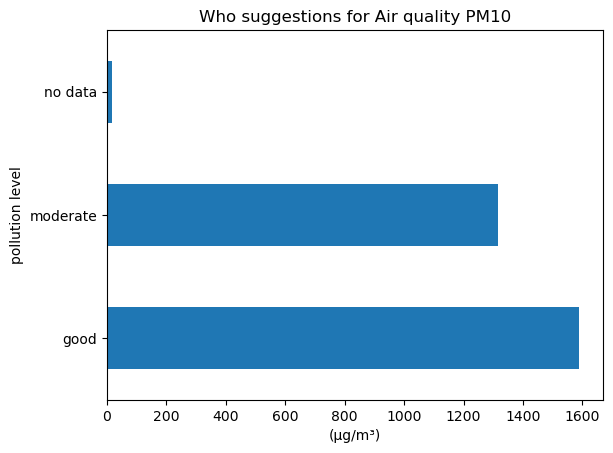

In [20]:
df_potsdam['pm10_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Who suggestions for Air quality PM10')

In [21]:
###woh air quality guideline for PM2.5

def who25_pollution_level(value):
    if value == value and value <= 4: #exclude NaN
        return "good"
    elif 6 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"
       

df_potsdam['pm25_pollution_level'] = df_potsdam['pm25'].map(who25_pollution_level)


Text(0.5, 1.0, 'Who suggestions for Air quality PM2.5')

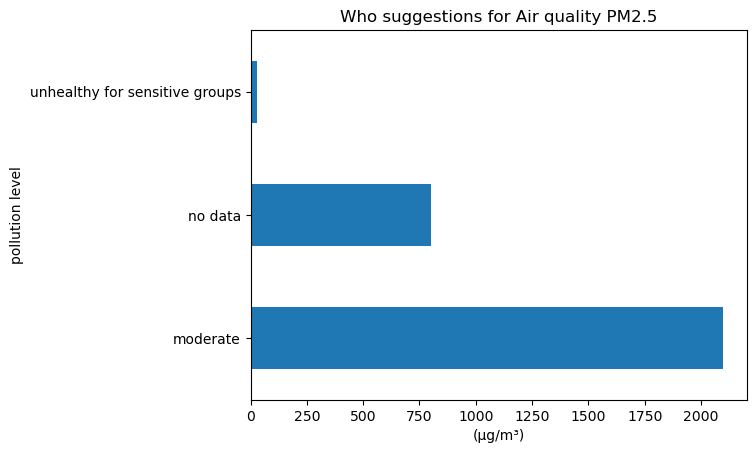

In [22]:
df_potsdam['pm25_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Who suggestions for Air quality PM2.5')